# APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011) PROJECT 2

### 22CS30027
### Golla Meghanandh Manvith Prabhash

##### Project on Logistic Regression

### Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import copy
import math

In [2]:
#Read the CSV File 
data = pd.read_csv('./framingham.csv')

In [3]:
#Print the head of the given data set
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Print Shape of data set given
data.shape

(4240, 16)

In [5]:
#Describe the data set given
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Print the info of the given Data Set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
# To check how many places are empty in data set
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#convert all columns in the data DataFrame to numeric data types
data = data.apply(pd.to_numeric, errors='coerce')

In [9]:
#Drop all the null rows in Data
data = data.dropna()

In [10]:
#Split the Given Data Set Into X and y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Function Defination Part

### Test And Train Split

In [11]:
#Function to split data into train and test 
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    split_index = int(X.shape[0] * (1 - test_size))
    
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

### Min Max Scaler 

In [12]:
#Function for doing the min max scalling
def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled

### Creating the Sigmoid Function

In [13]:
#function for finding sigmoid of given data
def sigmoid(z):
    g = None
    z = z.astype(float)
    g = 1 / (1 + np.exp(-z))
    return g

### Loss Function

In [14]:
#Loss function for the caliculation of the loss
def loss_function(X, y, w, b):
    m, n = X.shape
    total_cost = 0
    z = np.dot(X, w.T) + b
    f_wb = sigmoid(z)
    #Appling clipping for removing log(0)
    f_wb = np.clip(f_wb, 1e-10, 1 - 1e-10)
    for i in range(m):
        total_cost += -y[i] * np.log(f_wb[i]) - (1 - y[i]) * np.log(1 - f_wb[i])
    total_cost = total_cost[0]/m
    return total_cost

### Computing the Gradient of the Loss

In [15]:
#Gradient Calicuating function for Logistic Regression
def compute_gradient_logistic_regression(X, y, w, b):
    m, n = X.shape
    z = np.dot(X, w.T) + b
    f_wb = sigmoid(z)
    dj_db = np.sum(f_wb - y.reshape(-1,1))/m
    dj_dw = np.dot((f_wb - y.reshape(-1,1)).T, X)/m
    return dj_db, dj_dw

### Training the model using Batch Gradient Descent

In [16]:
#funtion for applying Gradient Descent Algorithm
def batch_gradient_descent_logistic_regression(X, y, w_in, b_in, alpha, num_iters) :
    m = len(X)
    # list to store the loss values for every iterations
    loss_hist = []
    for i in range(1,num_iters+1):
      dj_db, dj_dw = compute_gradient_logistic_regression(X, y, w_in, b_in)
      loss = loss_function(X, y, w_in, b_in)
      loss_hist.append(loss)
      if(i%100==0):
        print(f"Iteration {i:4}: Loss {loss}")
      w_in = w_in - alpha * dj_dw
      b_in = b_in - alpha * dj_db
    return w_in, b_in, loss_hist

### Initialize Parameters Function

In [17]:
#Function for initializing parameters 
def initialize_parameters(n):
    #Done seeding for making result same over any number of runs
    np.random.seed(27)
    alpha = np.random.uniform(0.01, 0.09)
    initial_w = np.random.normal(0, 1, (1,n))
    initial_b = np.random.normal(0,1)
    return initial_w,initial_b,alpha

### Predict Function

In [18]:
#Funtion forr Prediction
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    z = np.dot(X, w.T) + b
    f_wb = sigmoid(z)
    p = np.where(f_wb >= 0.5, 1, 0)
    p = p.reshape(1,-1)
    return p

## Calling the function and Training the Modal Part

In [19]:
# Min-Max scalling of X
X=min_max_scaler(X)

In [20]:
#Diving the X and y as Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# initialize the parameters (w an b) randomly
initial_w, initial_b, alpha = initialize_parameters(X.shape[1])
num_iterations = 1000
print("alpha : ",alpha)
print("Initial w : ",initial_w)
print("Initial b : ",initial_b)
w, b, loss_hist = batch_gradient_descent_logistic_regression(X_train ,y_train, initial_w, initial_b, alpha, num_iterations)
print("optimized parameter values w:", w)
print("optimized parameter value b:", b)

alpha :  0.044057712841511665
Initial w :  [[ 0.58828344  0.786179   -0.3072844   0.96966551  0.67761997 -0.81340079
   0.77052666  0.32498915  0.4220812   0.60623081 -0.22623987  0.26733617
  -1.07940753 -1.4818259  -0.46384722]]
Initial b :  0.390434102408928
Iteration  100: Loss 0.44746347846489987
Iteration  200: Loss 0.42929000324896766
Iteration  300: Loss 0.42368169426762164
Iteration  400: Loss 0.4196621386072345
Iteration  500: Loss 0.4165206167001173
Iteration  600: Loss 0.41401404478669174
Iteration  700: Loss 0.4119768913031789
Iteration  800: Loss 0.4102893615034494
Iteration  900: Loss 0.4088646599458332
Iteration 1000: Loss 0.40763980073443473
optimized parameter values w: [[ 0.17218046  0.69560744 -0.67845437 -0.04761184  0.45995336 -0.61341347
   0.77804002  0.764728    0.59774751  0.29492865 -0.28579047 -0.04526236
  -1.29591663 -1.84277744 -0.49844946]]
optimized parameter value b: -1.19296422222807


### Final Train and Test Accuracy

In [22]:
def accuracy(y, p):
    return np.mean(y == p)*100

# Confusion matrix calculation
def confusion_matrix(y,p):
    tp = np.sum((y == 1) & (p == 1))
    tn = np.sum((y == 0) & (p == 0))
    fp = np.sum((y == 0) & (p == 1))
    fn = np.sum((y == 1) & (p == 0))
    return np.array([[tp, fp], [fn, tn]])

# Precision, Recall, and F1-Score
def precision(y, p):
    tp = np.sum((y == 1) & (p == 1))
    fp = np.sum((y == 0) & (p == 1))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(y, p):
    tp = np.sum((y == 1) & (p == 1))
    fn = np.sum((y == 1) & (p == 0))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(y, p):
    p = precision(y, p)
    r = recall(y, p)
    return 2 * (p * r) / (p + r) if (p + r) != 0 else 0
    

In [23]:
#prediction for Accuracy of train data
print('For Train data:')
p_train = predict(X_train, w,b)
print('Train Accuracy: %f'%accuracy(y_train,p_train))
print(f'Train confusion matrix: \n{confusion_matrix(y_train,p_train)}')
print('Train Precision: %f'%precision(y_train,p_train))
print('Train Recall: %f'%recall(y_train,p_train))
print('Train F1 Score: %f'%f1_score(y_train,p_train))

#prediction for Accuracy of test data
print('\nFor Test data:')
p_test = predict(X_test, w,b)
print('Test Accuracy: %f'%accuracy(y_test,p_test))
print(f'Train confusion matrix: \n{confusion_matrix(y_test,p_test)}')
print('Train Precision: %f'%precision(y_test,p_test))
print('Train Recall: %f'%recall(y_test,p_test))
print('Train F1 Score: %f'%f1_score(y_test,p_test))

#prediction for Accuracy of test data
print('\nFor Total data:')
p = predict(X, w,b)
print('Accuracy: %f'%accuracy(y,p))
print(f'confusion matrix: \n{confusion_matrix(y,p)}')
print('Precision: %f'%precision(y,p))
print('Recall: %f'%recall(y,p))
print('F1 Score: %f'%f1_score(y,p))

For Train data:
Train Accuracy: 84.651841
Train confusion matrix: 
[[   2    0]
 [ 421 2320]]
Train Precision: 1.000000
Train Recall: 0.004728
Train F1 Score: 1.000000

For Test data:
Test Accuracy: 85.464481
Train confusion matrix: 
[[  1   0]
 [133 781]]
Train Precision: 1.000000
Train Recall: 0.007463
Train F1 Score: 1.000000

For Total data:
Accuracy: 84.855112
confusion matrix: 
[[   3    0]
 [ 554 3101]]
Precision: 1.000000
Recall: 0.005386
F1 Score: 1.000000


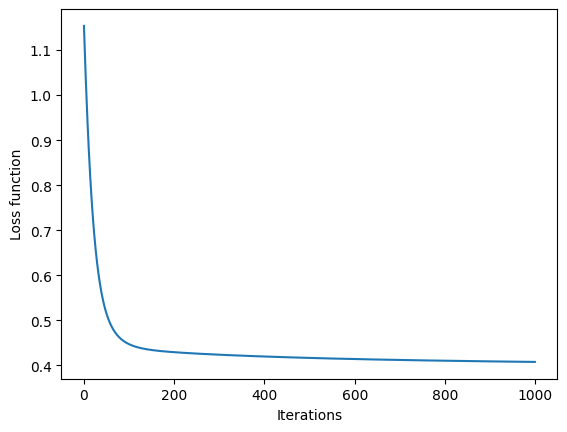

In [24]:
# PLotting the loss values for every training iterations
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()